## Task: Divide the image into rows

# Imports

In [357]:
import os

import cv2
import numpy as np
import pandas as pd
import math

from skimage import io

from time import strftime

from PIL import Image

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Constants

In [306]:
shelf_1_column_1="column_0.png"
shelf_1_column_2="column_1.png"
shelf_2_column_1="shelf2/columns/column_0.png"
shelf_2_column_2="shelf2/columns/column_1.png"
shelf_2_column_3="shelf2/columns/column_2.png"
row="https://www.businessinsider.in/photo/70485806/texas-teen-is-accused-of-urinating-on-a-walmart-shelf-in-the-same-week-that-a-woman-turned-herself-in-for-peeing-on-walmart-potatoes.jpg"

# Analyze image

### Preprocessing

In [74]:
img = cv2.cvtColor(io.imread(shelf_1_column_1), cv2.COLOR_RGB2BGR)
img.shape

(500, 293, 3)

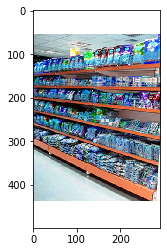

In [75]:
plt.imshow(img, interpolation='nearest')
plt.show()

#### convert to grey scale

In [115]:
img_thr_inv = cv2.threshold(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY), 127, 255, cv2.THRESH_TRUNC)[1]
img_thr_inv.shape

(382, 293)

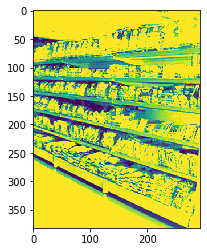

In [116]:
plt.imshow(img_thr_inv, interpolation='nearest')
plt.show()

### Using gausian blur with OTSU

In [17]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_thr = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

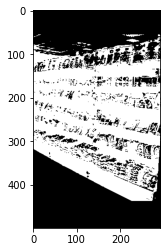

In [18]:
plt.imshow(img_thr, 'gray')
plt.show()

In [45]:
edges = cv2.Canny(gray, 80, 120)
lines = cv2.HoughLinesP(edges, 1, math.pi/2, 2, None, 30, 1);
for line in lines[0]:
    pt1 = (line[0],line[1])
    pt2 = (line[2],line[3])
    cv2.line(img, pt1, pt2, (255,255,255), 3)
cv2.imwrite("temp1.png", img)

True

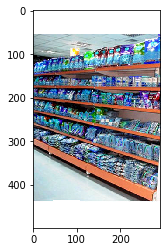

In [48]:
plt.imshow(deskewed_img, interpolation='nearest')
plt.show()

#### crop image to remove white blocks

In [19]:
coords = cv2.findNonZero(img_thr)
x, y, w, h = cv2.boundingRect(coords) 
rect = img[y:y+h, x:x+w] 
cv2.imwrite("rect.png", rect)

True

In [20]:
cropped_img = cv2.imread("rect.png")

In [47]:
deskewed_img deskew(img)

In [23]:
deskewed_img = deskew(cropped_img)

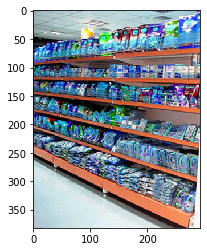

In [24]:
plt.imshow(deskewed_img, interpolation='nearest')
plt.show()

In [27]:
gray = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)


In [82]:
img_thr_inv = cv2.threshold(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY), 120, 255, cv2.)[1]
img_thr_inv.shape

(382, 293)

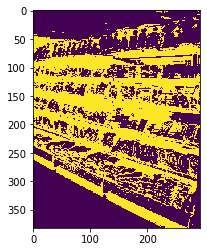

In [83]:
plt.imshow(img_thr_inv, interpolation='nearest')
plt.show()

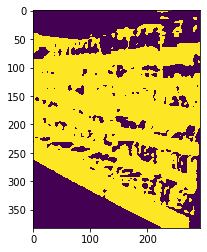

In [84]:
gray = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (9, 9), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
plt.imshow(thresh, interpolation='nearest')
plt.show()

## THRESH_TRUNC

In [117]:
x_sum = np.count_nonzero(img_thr_inv, axis=1)
x_sum.shape

(382,)

In [118]:
y = np.arange(x_sum.shape[0])
y.shape

(382,)

In [119]:
d = {'x': y, 'y': x_sum}
df = pd.DataFrame(data=d)

<AxesSubplot:xlabel='x', ylabel='y'>

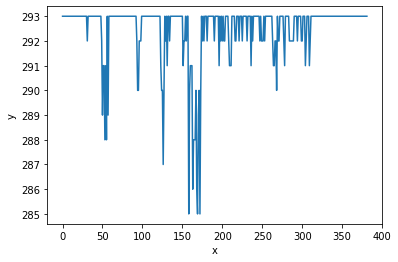

In [145]:
sns.lineplot(data=df,y="y",x="x",palette="flare")

### THRESH_TOZERO_INV

In [96]:
x_sum = np.count_nonzero(img_thr_inv, axis=1)
x_sum.shape

(382,)

In [97]:
y = np.arange(x_sum.shape[0])
y.shape

(382,)

In [98]:
d = {'x': y, 'y': x_sum}
df = pd.DataFrame(data=d)

<AxesSubplot:xlabel='x', ylabel='y'>

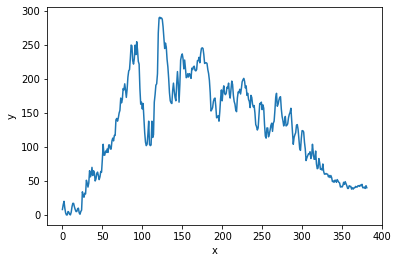

In [99]:
sns.lineplot(data=df,x="x",y="y",palette="flare")

### Moving forward with thresh_trunc

In [226]:
thr_x = 292
peaks = np.where(x_sum < thr_x)[0]
peaks.shape

(43,)

In [227]:
peaks[1]

51

In [228]:
peaks[-1]

309

In [229]:
peaks = np.concatenate(([0],peaks))
peaks = np.concatenate((peaks,[(peaks[-1] + 1000)]))

In [230]:
temp = np.diff(peaks).squeeze()
temp

array([  50,    1,    1,    1,    1,    1,    2,   37,    1,   28,    1,
          1,    1,    1,    4,   20,    7,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,   23,
         13,    1,    1,   25,   28,    1,    3,   10,   26,    5, 1000],
      dtype=int64)

In [231]:
np.where(temp > 20)[0]

array([ 0,  7,  9, 32, 36, 37, 41, 43], dtype=int64)

In [232]:
thr_y = 20
temp = np.diff(peaks).squeeze()
idx = np.where(temp > thr_y)[0]
peaks = np.concatenate(([0], peaks[idx+1]), axis=0) + 1

In [233]:
peaks.shape

(9,)

In [234]:
total_rows = 0

In [235]:
for i in np.arange(peaks.shape[0] -1):
    cv2.imwrite('temp_row' + str(i) + '.png', cropped_img[peaks[i]:peaks[i+1],:])
    total_rows += 1

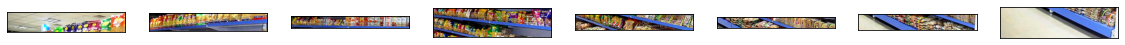

In [236]:
plt.figure(figsize=(25, 25))
for i in range (0,total_rows):
    plt.subplot(3,10,i+1)
    plt.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=False)
    img = plt.imread('temp_row' + str(i) + '.png')
    plt.imshow(img)

In [237]:
img = cv2.cvtColor(io.imread(shelf_2_column_1), cv2.COLOR_RGB2BGR)
img.shape

(680, 240, 3)

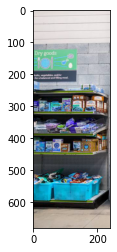

In [238]:
plt.imshow(img)

In [239]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_thr = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

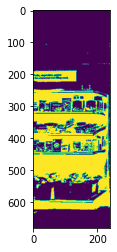

In [241]:
plt.imshow(img_thr)

In [242]:
coords = cv2.findNonZero(img_thr)
x, y, w, h = cv2.boundingRect(coords) 
rect = img[y:y+h, x:x+w] 
cv2.imwrite("rect1.png", rect)

True

In [243]:
cropped_img = cv2.imread("rect1.png")

In [244]:
img_thr_inv = cv2.threshold(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY), 127, 255, cv2.THRESH_TRUNC)[1]
img_thr_inv.shape

(530, 240)

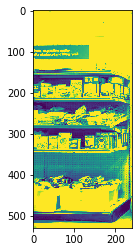

In [245]:
plt.imshow(img_thr_inv, interpolation='nearest')
plt.show()

In [261]:
img_thr = cv2.threshold(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY), 128, 255,cv2.THRESH_BINARY)[1]
img_thr.shape

(530, 240)

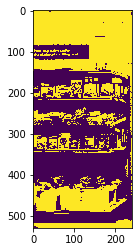

In [262]:
plt.imshow(img_thr, interpolation='nearest')
plt.show()

In [263]:
x_sum = np.count_nonzero(img_thr, axis=1)
x_sum.shape

(530,)

In [264]:
y = np.arange(x_sum.shape[0])
y.shape

(530,)

In [265]:
d = {'x': y, 'y': x_sum}
df = pd.DataFrame(data=d)

<AxesSubplot:xlabel='x', ylabel='y'>

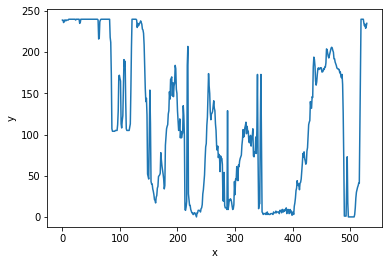

In [266]:
sns.lineplot(data=df,y="y",x="x",palette="flare")

In [291]:
thr_x = 100
peaks = np.where(x_sum < thr_x)[0]
peaks.shape

(243,)

In [292]:
peaks[1]

149

In [293]:
peaks[-1]

516

In [294]:
peaks = np.concatenate(([0],peaks))
peaks = np.concatenate((peaks,[(peaks[-1] + 1000)]))

In [295]:
temp = np.diff(peaks).squeeze()
temp

array([ 148,    1,    1,    4,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,   25,    2,    5,
          1,    1,    1,    1,    3,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,   18,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    2,    1,    8,    1,    1,    1,    1,
          1,    1,    2,    1,    1,    1,    1,    1,    3,    1,    1,
          1,    3,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,   

In [296]:
np.where(temp > 5)[0]

array([  0,  30,  69, 116, 215, 243], dtype=int64)

In [297]:
thr_y = 5
temp = np.diff(peaks).squeeze()
idx = np.where(temp > thr_y)[0]
peaks = np.concatenate(([0], peaks[idx+1]), axis=0) + 1

In [298]:
peaks.shape

(7,)

In [299]:
total_rows = 0

In [300]:
for i in np.arange(peaks.shape[0] -1):
    cv2.imwrite('temp_row1' + str(i) + '.png', cropped_img[peaks[i]:peaks[i+1],:])
    total_rows += 1

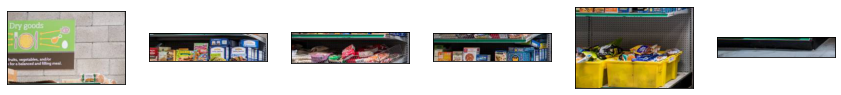

In [301]:
plt.figure(figsize=(25, 25))
for i in range (0,total_rows):
    plt.subplot(3,10,i+1)
    plt.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=False)
    img = plt.imread('temp_row1' + str(i) + '.png')
    plt.imshow(img)

## Trying with a cleaner image

In [307]:
img = cv2.cvtColor(io.imread(row), cv2.COLOR_RGB2BGR)
img.shape

(720, 960, 3)

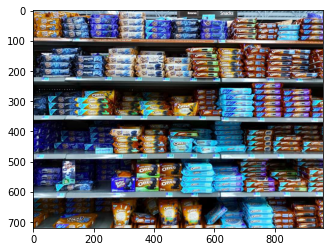

In [308]:
plt.imshow(img)

In [309]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_thr = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

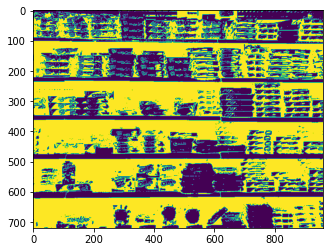

In [310]:
plt.imshow(img_thr)

In [311]:
coords = cv2.findNonZero(img_thr)
x, y, w, h = cv2.boundingRect(coords) 
rect = img[y:y+h, x:x+w] 
cv2.imwrite("rect2.png", rect)

True

In [312]:
cropped_img = cv2.imread("rect2.png")

In [313]:
img_thr_inv = cv2.threshold(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY), 127, 255, cv2.THRESH_TRUNC)[1]
img_thr_inv.shape

(720, 960)

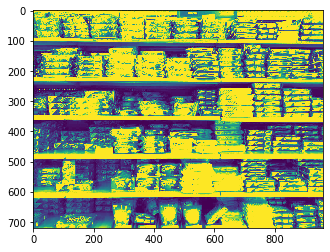

In [314]:
plt.imshow(img_thr_inv, interpolation='nearest')
plt.show()

In [315]:
img_thr = cv2.threshold(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY), 128, 255,cv2.THRESH_BINARY)[1]
img_thr.shape

(720, 960)

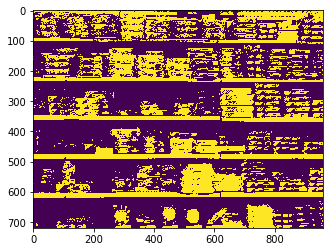

In [316]:
plt.imshow(img_thr, interpolation='nearest')
plt.show()

In [317]:
x_sum = np.count_nonzero(img_thr, axis=1)
x_sum.shape

(720,)

In [318]:
y = np.arange(x_sum.shape[0])
y.shape

(720,)

In [319]:
d = {'x': y, 'y': x_sum}
df = pd.DataFrame(data=d)

<AxesSubplot:xlabel='x', ylabel='y'>

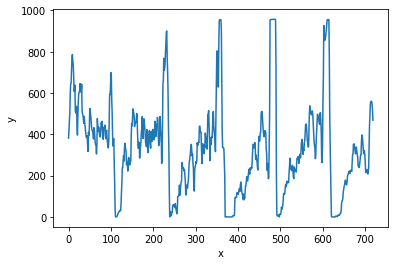

In [320]:
sns.lineplot(data=df,y="y",x="x",palette="flare")

In [332]:
thr_x = 700
peaks = np.where(x_sum > thr_x)[0]
peaks.shape

(54,)

In [333]:
peaks[1]

8

In [334]:
peaks[-1]

616

In [335]:
peaks = np.concatenate(([0],peaks))
peaks = np.concatenate((peaks,[(peaks[-1] + 1000)]))

In [336]:
temp = np.diff(peaks).squeeze()
temp

array([   7,    1,    1,    1,    1,  214,    1,    1,    1,    1,    1,
          1,    1,    1,    1,  116,    1,    1,    3,    1,    1,    1,
          1,    1,    1,  115,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,  113,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1, 1000],
      dtype=int64)

In [337]:
np.where(temp > 100)[0]

array([ 5, 15, 25, 40, 54], dtype=int64)

In [338]:
thr_y = 5
temp = np.diff(peaks).squeeze()
idx = np.where(temp > thr_y)[0]
peaks = np.concatenate(([0], peaks[idx+1]), axis=0) + 1

In [339]:
peaks.shape

(7,)

In [340]:
total_rows = 0

In [341]:
for i in np.arange(peaks.shape[0] -1):
    cv2.imwrite('temp_row2' + str(i) + '.png', cropped_img[peaks[i]:peaks[i+1],:])
    total_rows += 1

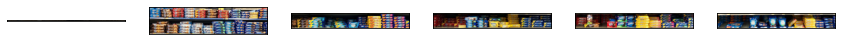

In [342]:
plt.figure(figsize=(25, 25))
for i in range (0,total_rows):
    plt.subplot(3,10,i+1)
    plt.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=False)
    img = plt.imread('temp_row2' + str(i) + '.png')
    plt.imshow(img)

# Trying to utilize the same column function by rotating the image

In [354]:
def divide_into_column(image,dir_name,threshold_x, threshold_y,link=False,invert=False, draw=False):
    if link:
        image = io.imread(image)
    else:
        image = image
        
    img = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
    cv2_thresh = cv2.THRESH_BINARY_INV if invert else cv2.THRESH_BINARY 
    
    img_thr = cv2.threshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), 128, 255, cv2_thresh)[1]
    
    if draw:
        plt.imshow(img_thr, interpolation='nearest')
        plt.show()
    
    y_sum = np.count_nonzero(img_thr, axis=0)
    x = np.arange(y_sum.shape[0])    
    peaks = np.where(y_sum < threshold_y)[0] if invert else np.where(y_sum > threshold_y)[0]
    
    if draw:
        d = {'x': x, 'y': y_sum}
        df = pd.DataFrame(data=d)
        sns.lineplot(data=df,x="x",y="y",palette="flare")
    
    #prepending and appending to divide image froms srart to end
    peaks = np.concatenate(([0],peaks))
    peaks = np.concatenate((peaks,[(peaks[-1] + 1000)]))
    
    if draw:
        print("First element: ", peaks[0])
        print("Second element: ", peaks[1])
        print("Second last element: ",peaks[-2])
        print("last element: ",peaks[-1])

    #clean the peaks
    temp = np.diff(peaks).squeeze()
    idx = np.where(temp > threshold_x)[0]
    peaks = np.concatenate(([0], peaks[idx+1]), axis=0) + 1
    
    if draw:
        print("First element: ", peaks[0])
        print("Second element: ", peaks[1])
        print("Second last element: ",peaks[-2])
        print("last element: ",peaks[-1])
    
    try:
        os.makedirs(dir_name)
    except OSError as err:
        print(err.strerror)
    else:
        print('Successfully created directory')
        
    total_columns = 0
    for i in np.arange(peaks.shape[0] -1):
        cv2.imwrite(dir_name + '/column_' + str(i) + '.png', img[:, peaks[i]:peaks[i+1]])
        total_columns += 1
    
    print("Succesfully divided the image into" , total_columns, "parts")
    
    return (y_sum,peaks,total_columns)

In [345]:
image = cv2.rotate(cropped_img, cv2.ROTATE_90_CLOCKWISE) 

In [355]:
# cv2.imread(image)

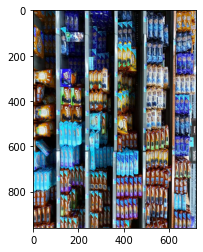

In [352]:
plt.imshow(image)

In [349]:
img_thr = cv2.threshold(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), 128, 255,cv2.THRESH_BINARY)[1]
img_thr.shape

(960, 720)

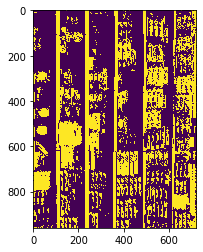

In [350]:
plt.imshow(img_thr, interpolation='nearest')
plt.show()

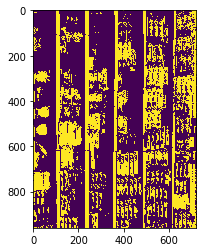

First element:  0
Second element:  0
Second last element:  717
last element:  1717
First element:  1
Second element:  103
Second last element:  484
last element:  1718
Successfully created directory
Succesfully divided the image into 5 parts


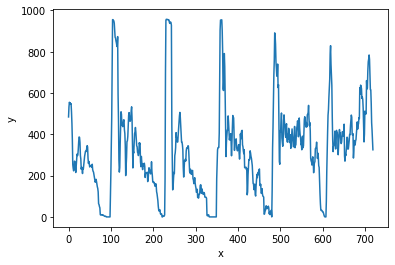

In [358]:
(y_sum,peaks,total_columns) = divide_into_column(image=image,dir_name="shelf3/rows",threshold_x=50,threshold_y=400,draw=True)

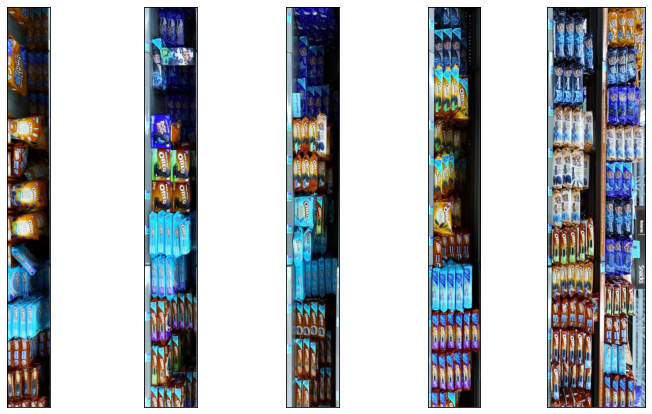

In [362]:
plt.figure(figsize=(25, 25))
for i in range (0,total_columns):
    plt.subplot(3,10,i+1)
    plt.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=False)
    img = plt.imread('shelf3/rows/column_' + str(i) + '.png')
    plt.imshow(img)